<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

The **"spam"** concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

**For background on spam:**

Cranor, Lorrie F., LaMacchia, Brian A. Spam!
Communications of the ACM, 41(8):74-83, 1998.

> (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.

> (b) Determine whether a given email is spam or not.

> (c) ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter.

### b) Defining the Metric for Success

> The metric for success for this project would be to use KNeighborsClassifier algorithm for our model.

### c) Understanding the context 

##### Resources.

> **<a href='https://archive.org/download/train5_202002/train%20%285%29.csv'>Train Dataset**</a>

> **<a href="https://archive.org/download/test1_202002/test%20%281%29.csv">Test Dataset**</a>

**Attribute Information:**

> The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

> 48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

> 6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

> 1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

> 1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [123]:
# Import the necessary libraries
#
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

In [124]:
# Loading the Data from the source i.e. csv
# ---
# Train Dataset source = https://archive.org/download/train5_202002/train%20%285%29.csv
# Test Dataset source = https://archive.org/download/test1_202002/test%20%281%29.csv
# ---
#
train = pd.read_csv("train.csv")
train.columns

test = pd.read_csv("test.csv")



## 3. Checking the Data

In [125]:
# Determining the no. of records in our dataset
#
print(f" Train: {train.shape}\n Test: {test.shape}")

 Train: (891, 12)
 Test: (418, 11)


In [126]:
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
# Previewing the bottom of our dataset
# 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [128]:
# Checking whether each column has an appropriate datatype
#
print(f" Train: \n{train.info()}")
print(f" Test:\n {test.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 Train: 
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [129]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 Ourtliers:
 [[], [], [], [66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0], [3.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.0, 4.0, 5.0, 3.0, 3.0, 4.0, 8.0, 4.0, 4.0, 3.0, 8.0, 4.0, 8.0, 3.0, 4.0, 4.0, 4.0, 4.0, 8.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 4.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 4.0, 8.0, 4.0, 3.0, 4.0, 8.0, 4.0, 8.0], [1.0, 2.0, 1.0, 5.0, 1.0, 1.0, 5.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0

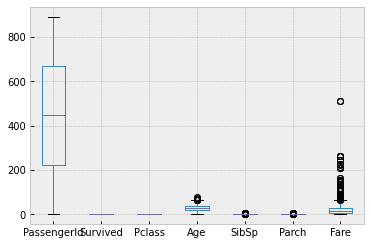

In [130]:
# Define the numeric columns
#
numeric = train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

plt.style.use('bmh')

# Checking for Outliers.
# plotting outliers for the numeric columns
#
_t, cols = pd.DataFrame.boxplot(numeric, return_type='both')

outliers = [flier.get_ydata() for flier in cols['fliers']]
out_list = [i.tolist() for i in outliers]

print(f" Ourtliers:\n {out_list}")

In [131]:
numeric.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



> **From the plot above we can see that 

In [132]:
 # Identifying the Missing Data
#
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Train missing values: 866
Test missing values: 414


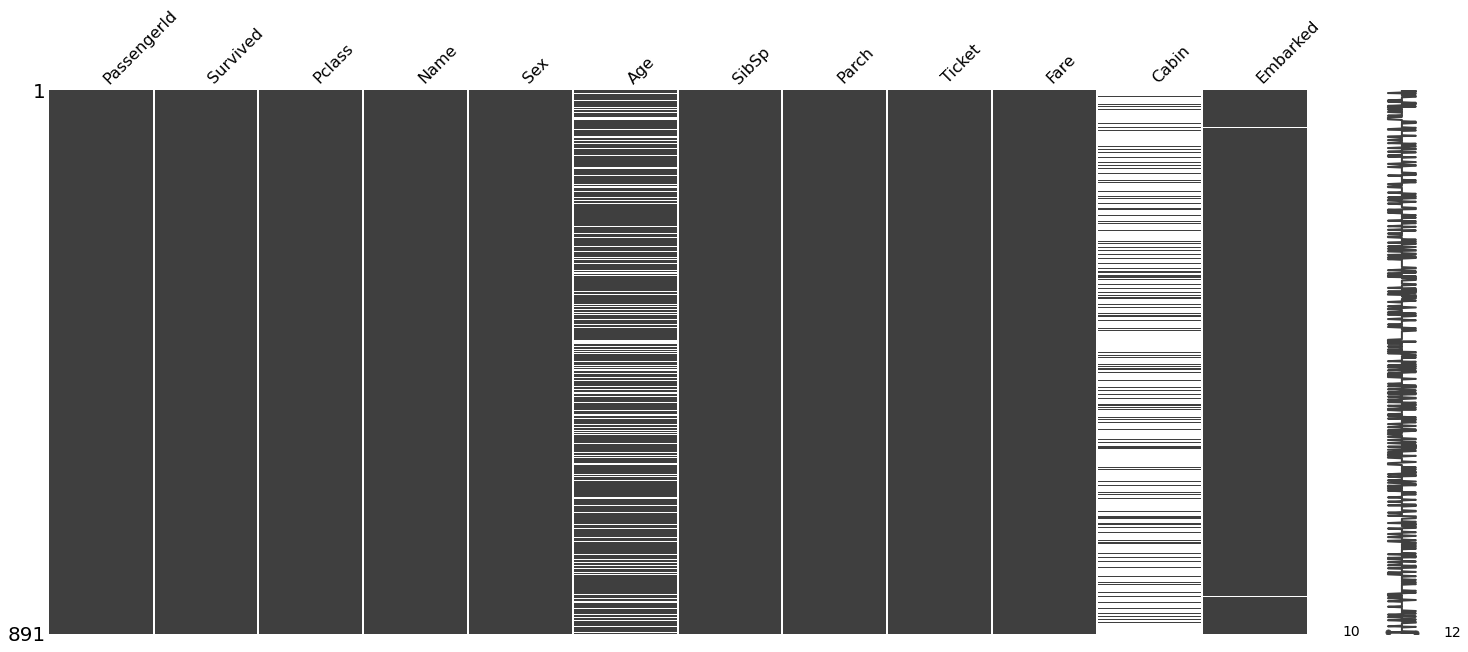

In [133]:
# Identifying the Missing Data
# Plotting the distribution of null values.
#
import missingno as msno 
msno.matrix(train[list(train.columns)[:]])
print('Train missing values:', train.isna().sum().sum())
print('Test missing values:', test.isna().sum().sum())

> **We observe that only two columns have null values. These columns are Cabin and Embarked.**

In [134]:
# Dealing with the Missing Data
#
train.dropna(inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [135]:
# Dealing with the Missing Data
#
test.dropna(inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [136]:
# More data cleaning procedures
#
train.duplicated().sum()


0

In [137]:
# More data cleaning procedures
#
test.duplicated().sum()


0

## 6. Exploratory Analysis

In [138]:
# Check for the Number of Survived Passengers based on SEX
#
sex = train.groupby('Sex').count()['Survived'].reset_index(False).sort_values(by='Sex', ascending=False)

sex.style.background_gradient(cmap='Accent')


,Sex,Survived
1,male,95
0,female,88


In [139]:
# Check for the Number of Survived Passengers based on AGE
#
age = train.groupby('Age').count()['Survived'].reset_index(False).sort_values(by='Age', ascending=False)
age.style.background_gradient(cmap='Accent')

,Age,Survived
62,80.000000,1
61,71.000000,1
60,70.000000,1
59,65.000000,2
58,64.000000,1
57,63.000000,1
56,62.000000,1
55,61.000000,2
54,60.000000,2
53,58.000000,5


In [140]:
# Check for the Number of Survived Passengers based on Passenger Class.
#
Pclass = train.groupby('Pclass').count()['Survived'].reset_index(False).sort_values(by='Pclass', ascending=False)
Pclass.style.background_gradient(cmap='Accent')

,Pclass,Survived
2,3,10
1,2,15
0,1,158


In [141]:
!pip install --upgrade plotly


Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.8.1)


In [142]:
# Tree map of passengers who survived based on their Ages.
#
import plotly.express as px

fig = px.treemap(sex, path=['Sex'], values='Survived', color='Survived', title= "Tree of Passenger's Sex")
fig.show()

> From the tree map we can clearly see that there were more male passanger survivors compared to their female counterparts.

In [143]:
# Tree map of passengers who survived based on their Ages.
#
import plotly.express as px

fig = px.treemap(age, path=['Age'], values='Survived', color='Survived', title= "Tree of Passenger's Ages")
fig.show()

> From the treemap above, we can see passengers who had the hoghest number of survivors based on their ages.

> Passengers with Ages 36, 24, 19 and 35 had the highest number of survivors respectively.

> Passengers with Ages 80, 70, 64 and 71 had the lowest number of survivors respectively.


In [144]:
# Tree map of passengers who survived based on their Ages.
#
import plotly.express as px

fig = px.treemap(Pclass, path=['Pclass'], values='Survived', color='Survived', title= "Tree of Passenger's Class")
fig.show()

> From the treemap above, we can see passengers who had the highest number of survivors based on their Travelling Passenger Class.

> Passengers in First Class had the highest number of survivors with 158 passengers surviving.

> Passengers in Second Class had the second Highest number of survivors with 15 passengers surviving.

> Passengers in Third Class had the lowest number of survivors with only 10 passengers surviving.

> We clearly see that the passenger travelling class was a huge factor into whether a passenger would survive or not.

In [145]:
# Plot a comparison of the passangers suvivability based on Age and sex.
#
fig = px.scatter(train, x="Age", y="Sex", color="Survived")
fig.show()

**Observations**

> Earlier we had plotted a tree map of survived passengers based on their genders and we observed that males had the highest number of survivors. 

> We discover that the number of female victims is actually much lower compared to that of the male regardless of males having more survivors. 

> Maybe the number of male passangers was much higher than that of the female thus leading to this disparity.


In [146]:
# Plot a comparison of the passangers suvivability based on Age and Pclass.
#
fig = px.scatter(train, x="Age", y="Pclass", color="Survived")
fig.show()

> Earlier we had observed that Passenger Class 1 had more survivors than the other Passenger classes.

> This can be partly due to the high number of passengers in that class.

> We also observe that passenger class 1 also had the highest number of passenger deaths, which maybe related to the high number of passengers in that particular class.

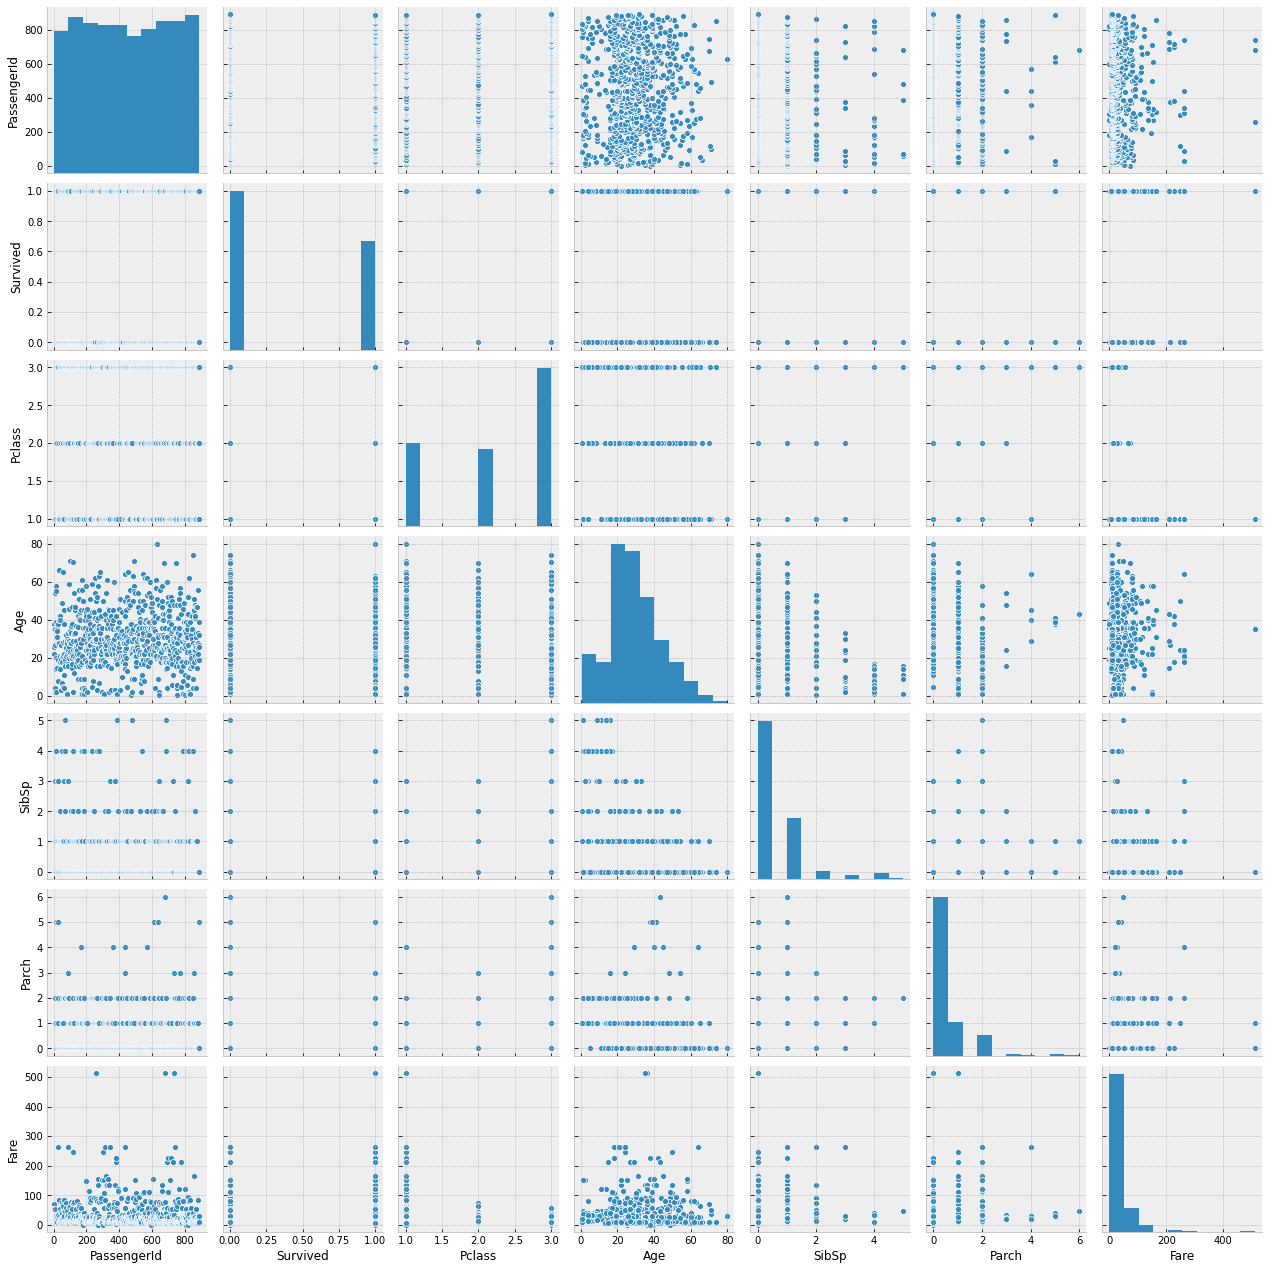

In [147]:
 # Ploting the bivariate summaries and recording our observations
#
sns.pairplot(numeric)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.359653 -0.077221 -0.017358  0.093317  0.268189
Pclass   -0.359653  1.000000 -0.369226  0.067247  0.025683 -0.554182
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.017358  0.067247 -0.308247  1.000000  0.383820  0.138329
Parch     0.093317  0.025683 -0.189119  0.383820  1.000000  0.205119
Fare      0.268189 -0.554182  0.096067  0.138329  0.205119  1.000000


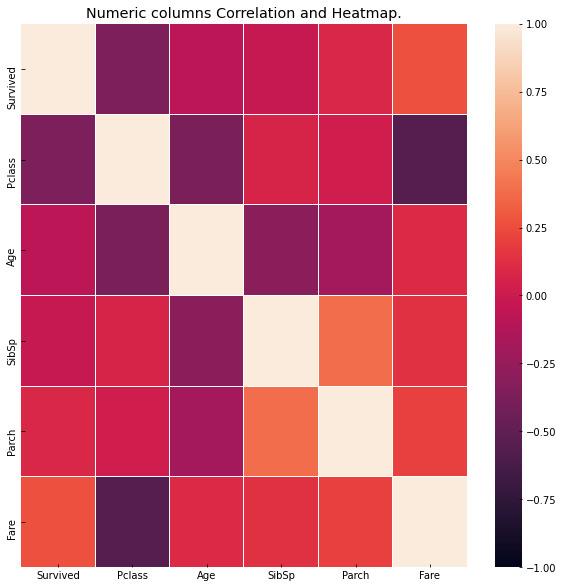

In [148]:
# Plot a heatmap of the numerical variables.
#
numeric = numeric.drop(['PassengerId'], 1)
plt.figure(figsize = (10,10))
plt.title('Numeric columns Correlation and Heatmap.')
corr = numeric.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

> **We can see that the variables in question are not highly correlated.**

In [149]:
numeric = numeric.iloc[:, 1:]
numeric.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## 7. Implementing the Solution

In [151]:
# Implementing the Solution
# 
sc = StandardScaler()

X = train[['Age', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

# Split the data into Train and Test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf = KNeighborsClassifier(5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,37.000000,37.000000
mean,0.810811,0.837838
std,0.397061,0.373684
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [152]:
# Mean squared Error
#
from sklearn import metrics

print(f"MSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

MSE: 0.4931969619160719


Predicted  0   1
Actual          
0          2   5
1          4  26


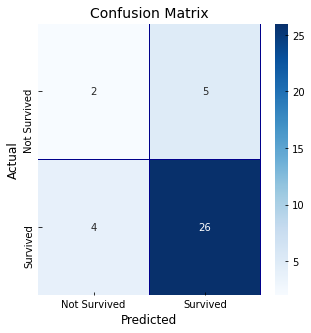

In [153]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
# 1= default
# 0 = No default

### Using AdaBoost to Boost the model performance.

In [154]:
# Checking the accuracy
# -----
# Using AdaBoost
#
from sklearn.metrics import accuracy_score, precision_score, recall_score

credit = AdaBoostClassifier(n_estimators=300)

credit.fit(X_train, y_train)
y_pred = credit.predict(X_test)

print("Accuracy score after AdaBoost:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision score after AdaBoost:",metrics.precision_score(y_test, y_pred)*100)
print("Recall score after AdaBoost:",metrics.recall_score(y_test, y_pred)*100)

Accuracy score after AdaBoost: 81.08108108108108
Precision score after AdaBoost: 87.09677419354838
Recall score after AdaBoost: 90.0


Predicted  0   1
Actual          
0          3   4
1          3  27


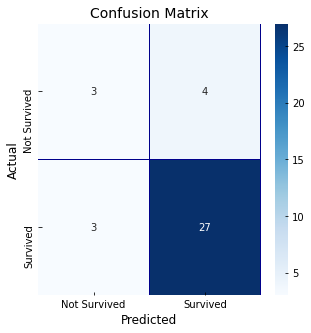

In [155]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
# 1= default
# 0 = No default

> Using Ada Boost the model Accuracy increased to 81% and the errors reduced

In [156]:
!pip3 install catboost

### Using CatBoost to Boost the model performance.

In [157]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model


# Split data into features and Labels
#

model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.077)


In [158]:
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X_train, y_train)

# make a single prediction
y_pred = model.predict(X_test)
y_pred

print("Accuracy score after CatBoost:",metrics.accuracy_score(y_test, y_pred)*100)
print("\nPrecision score after CatBoost:",metrics.precision_score(y_test, y_pred)*100)
print("Recall score after CatBoost:",metrics.recall_score(y_test, y_pred)*100)

Accuracy score after CatBoost: 83.78378378378379

Precision score after CatBoost: 87.5
Recall score after CatBoost: 93.33333333333333


> After applying Catboost to our model, the Accuracy score increased to 83.8%. 

Predicted  0   1
Actual          
0          3   4
1          2  28


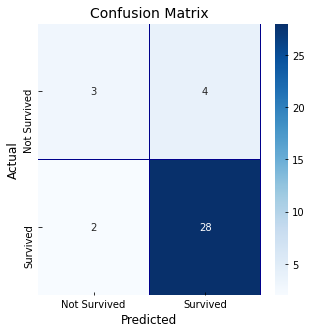

In [159]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
# 1= default
# 0 = No default

> CatBoost also increased the number of correct predictions for the passengers who survived from the original prediction which was 26 to 28. The prediction of passengers who did not survive also incresed by a margin of 1 to 3. 

> The True Positive Error reduced from 4 to 2 while the True Negative Error reduced from 5 to 4.

> This slight improvement in the model performance comes as a result of applying Catboost and helps us make our model slightly better at predicting which is a good thing.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [160]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> We had the right data to build our model.

### b). Do we need other data to answer our question?

> We might need other data for a ore accurate model but the data we have is also good for model building.

### c). Did we have the right question?

> We had the right questions for this particular project.